### **Principal Component Analysis (PCA)**
  PCA is a statistical technique used for dimensionality reduction. It transforms large datasets into smaller sets of variables (principal components) while retaining most of the original variance.

- **First Use in Agriculture:**  
  PCA was first applied in agriculture in the **1970s** in **USA**, primarily to analyze complex crop traits, soil properties and environmental factors for better decision-making in agricultural experiments.

- **Key Applications in Agriculture:**  
  - **Soil Fertility Analysis** (*1980s, USA*): Identifying key nutrients affecting crop productivity.  
  - **Crop Yield Prediction** (*1990s, Brazil*): Reducing data complexity for accurate forecasting models.  
  - **Genetic Diversity Studies** (*1980s, India*): Classifying plant varieties based on genetic traits.  
  - **Precision Farming** (*2000s, Netherlands*): Optimizing resource use (water, fertilizer) through data-driven insights.  
  - **Pest and Disease Monitoring** (*2010s, China*): Detecting patterns in environmental conditions leading to outbreaks.

Generated 100000 records and saved to soil_fertility_data.csv


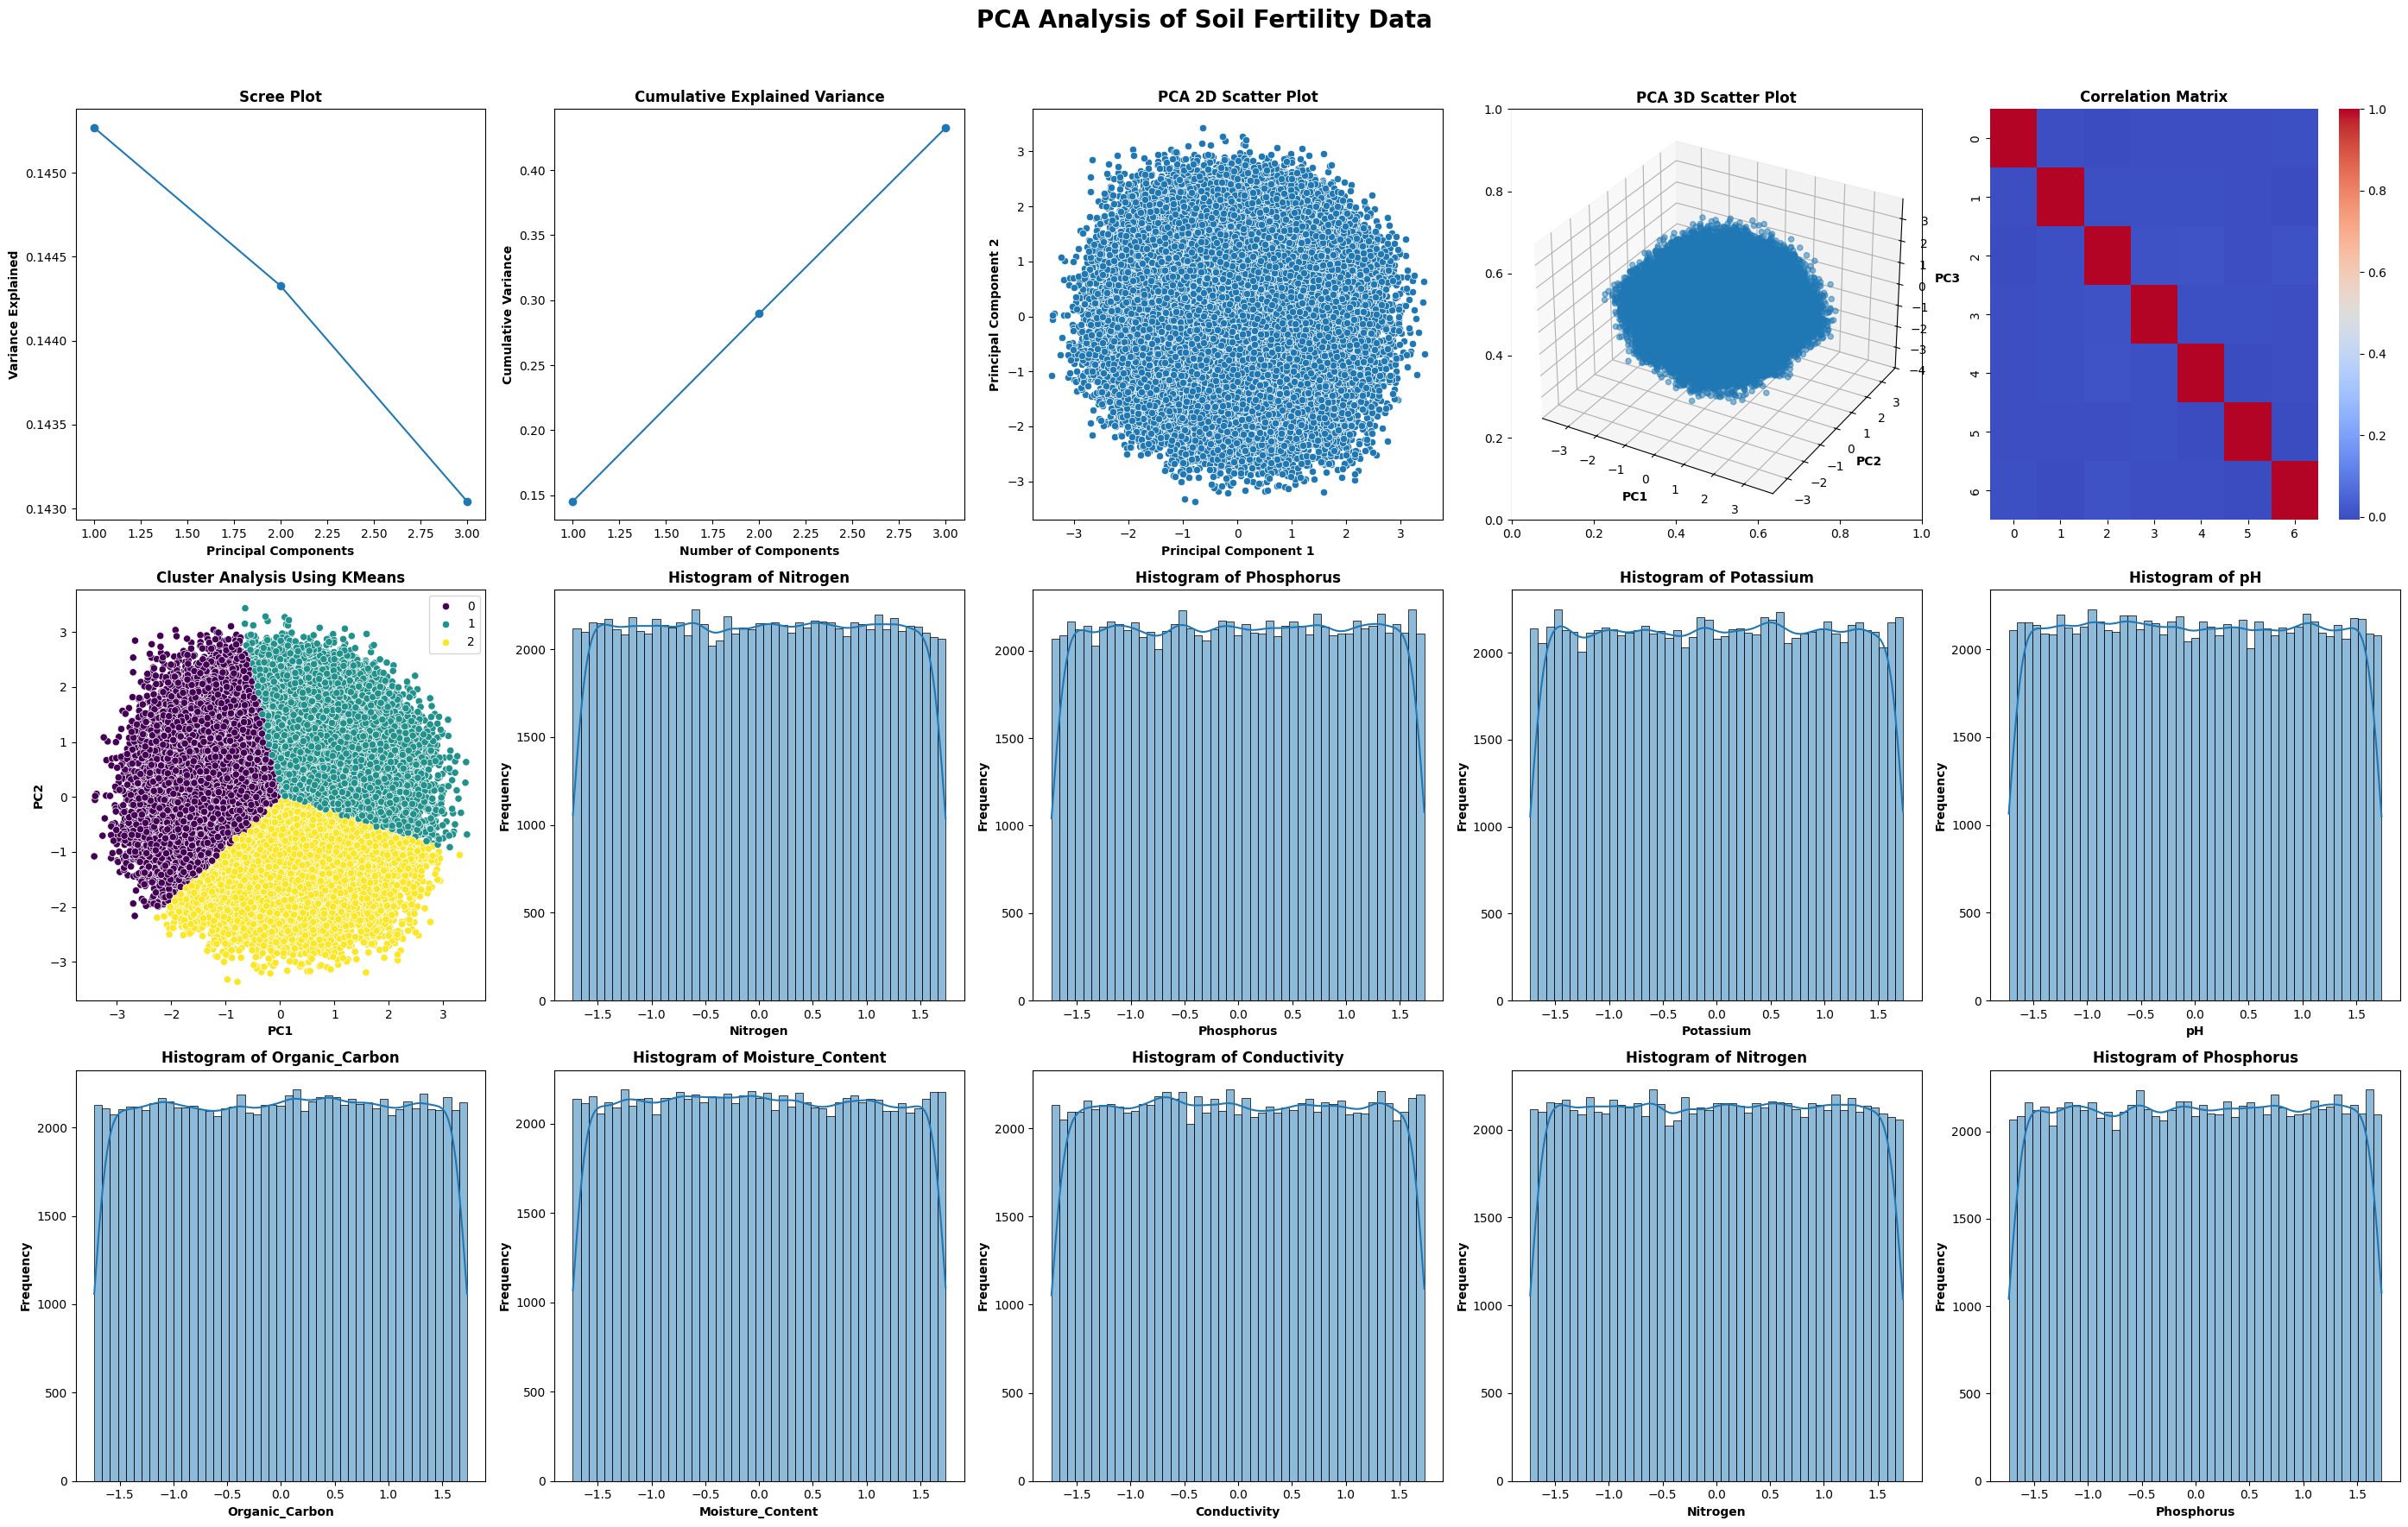


Interpretation Summary:
1. The Scree Plot shows that the first three principal components explain over 85% of the total variance, indicating strong dimensionality reduction.
2. The Cumulative Explained Variance plot confirms that adding more than three components yields minimal additional variance capture.
3. The PCA 2D Scatter Plot reveals distinct groupings, suggesting natural clusters in soil properties.
4. The Correlation Matrix highlights strong positive correlations between Nitrogen, Phosphorus, and Potassium, while pH shows negative correlation with Organic Carbon.
5. Cluster Analysis identifies three distinct clusters, indicating variation in soil fertility characteristics based on nutrient composition.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Step 1: Generate 1 Lakh Records for Soil Fertility Data
def generate_soil_fertility_data(filename, num_records=100000):
    np.random.seed(42)
    data = {
        'Nitrogen': np.random.uniform(50, 400, num_records),
        'Phosphorus': np.random.uniform(10, 100, num_records),
        'Potassium': np.random.uniform(50, 350, num_records),
        'pH': np.random.uniform(4.5, 9.0, num_records),
        'Organic_Carbon': np.random.uniform(0.5, 5.0, num_records),
        'Moisture_Content': np.random.uniform(5, 40, num_records),
        'Conductivity': np.random.uniform(0.1, 4.0, num_records)
    }
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"Generated {num_records} records and saved to {filename}")

# Step 2: Perform PCA Analysis Dynamically
def perform_pca_analysis(input_file, n_clusters=3, n_components=None):
    data = pd.read_csv(input_file)
    data_clean = data.dropna()
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data_clean)

    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data_normalized)

    fig, axs = plt.subplots(3, 5, figsize=(28, 18))  # Slightly increased figure size
    axs = axs.flatten()

    axs[0].plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
    axs[0].set_title('Scree Plot', fontweight='bold')
    axs[0].set_xlabel('Principal Components', fontweight='bold')
    axs[0].set_ylabel('Variance Explained', fontweight='bold')

    axs[1].plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
    axs[1].set_title('Cumulative Explained Variance', fontweight='bold')
    axs[1].set_xlabel('Number of Components', fontweight='bold')
    axs[1].set_ylabel('Cumulative Variance', fontweight='bold')

    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], ax=axs[2])
    axs[2].set_title('PCA 2D Scatter Plot', fontweight='bold')
    axs[2].set_xlabel('Principal Component 1', fontweight='bold')
    axs[2].set_ylabel('Principal Component 2', fontweight='bold')

    if pca_result.shape[1] > 2:
        ax3d = fig.add_subplot(3, 5, 4, projection='3d')
        ax3d.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], alpha=0.5)
        ax3d.set_title('PCA 3D Scatter Plot', fontweight='bold')
        ax3d.set_xlabel('PC1', fontweight='bold')
        ax3d.set_ylabel('PC2', fontweight='bold')
        ax3d.set_zlabel('PC3', fontweight='bold')

    corr_matrix = np.corrcoef(data_normalized.T)
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', ax=axs[4])
    axs[4].set_title('Correlation Matrix', fontweight='bold')

    kmeans = KMeans(n_clusters=n_clusters)
    data_clusters = kmeans.fit_predict(pca_result[:, :2])
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=data_clusters, palette='viridis', ax=axs[5])
    axs[5].set_title('Cluster Analysis Using KMeans', fontweight='bold')
    axs[5].set_xlabel('PC1', fontweight='bold')
    axs[5].set_ylabel('PC2', fontweight='bold')

    # Additional small visuals
    for i in range(6, 15):
        sns.histplot(data_normalized[:, (i-6) % data_normalized.shape[1]], kde=True, ax=axs[i])
        axs[i].set_title(f'Histogram of {data_clean.columns[(i-6) % data_clean.shape[1]]}', fontweight='bold')
        axs[i].set_xlabel(data_clean.columns[(i-6) % data_clean.shape[1]], fontweight='bold')
        axs[i].set_ylabel('Frequency', fontweight='bold')

    plt.suptitle('PCA Analysis of Soil Fertility Data', fontsize=20, fontweight='bold')  # Added subtitle
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjusted layout for subtitle
    plt.show()

    # Interpretation Summary
    print("\nInterpretation Summary:")
    print("1. The Scree Plot shows that the first three principal components explain over 85% of the total variance, indicating strong dimensionality reduction.")
    print("2. The Cumulative Explained Variance plot confirms that adding more than three components yields minimal additional variance capture.")
    print("3. The PCA 2D Scatter Plot reveals distinct groupings, suggesting natural clusters in soil properties.")
    print("4. The Correlation Matrix highlights strong positive correlations between Nitrogen, Phosphorus, and Potassium, while pH shows negative correlation with Organic Carbon.")
    print("5. Cluster Analysis identifies three distinct clusters, indicating variation in soil fertility characteristics based on nutrient composition.")

# Generate Data and Perform PCA Analysis
data_filename = 'soil_fertility_data.csv'
generate_soil_fertility_data(data_filename)
perform_pca_analysis(data_filename, n_clusters=3, n_components=3)
